In [26]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
df = pd.read_csv('data/musicgenre.csv')

# Handle missing values
df = df.dropna(subset=['music_genre'])
df = df.replace("?", None).dropna()

# Encode the 'music_genre' column
genre_encoder = LabelEncoder()
df['music_genre'] = genre_encoder.fit_transform(df['music_genre'])

# Create a mapping dictionary for the music genres
genre_mapping = dict(zip(genre_encoder.transform(genre_encoder.classes_), genre_encoder.classes_))

# Verify the genre mapping
print("Genre mapping:", genre_mapping)

# Encode other categorical features
key_encoder = LabelEncoder()
df['key'] = key_encoder.fit_transform(df['key'])
mode_encoder = LabelEncoder()
df['mode'] = mode_encoder.fit_transform(df['mode'])

# Scale the features
df["duration_ms"] = df["duration_ms"] / 1000

# Drop irrelevant columns
df.drop(['track_name', 'instance_id', 'obtained_date', 'artist_name'], axis=1, inplace=True)

# Split the data into features and target
X = df.drop(columns=['music_genre'])
y = df['music_genre']

# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Apply KMeans clustering
n_clusters = len(np.unique(y))
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(X_tsne)

# Map clusters to music genres
cluster_genre_mapping = {}

for cluster in range(n_clusters):
    cluster_indices = np.where(clusters == cluster)
    genres_in_cluster = y.iloc[cluster_indices]
    most_common_genre = genres_in_cluster.mode()[0]
    cluster_genre_mapping[cluster] = most_common_genre

# Predict the music genre based on clusters
y_pred = [cluster_genre_mapping[cluster] for cluster in clusters]

# Calculate the accuracy
accuracy = accuracy_score(y, y_pred)
print(f'Clustering accuracy: {accuracy:.2f}')

Genre mapping: {0: 'Alternative', 1: 'Anime', 2: 'Blues', 3: 'Classical', 4: 'Country', 5: 'Electronic', 6: 'Hip-Hop', 7: 'Jazz', 8: 'Rap', 9: 'Rock'}
Clustering accuracy: 0.17


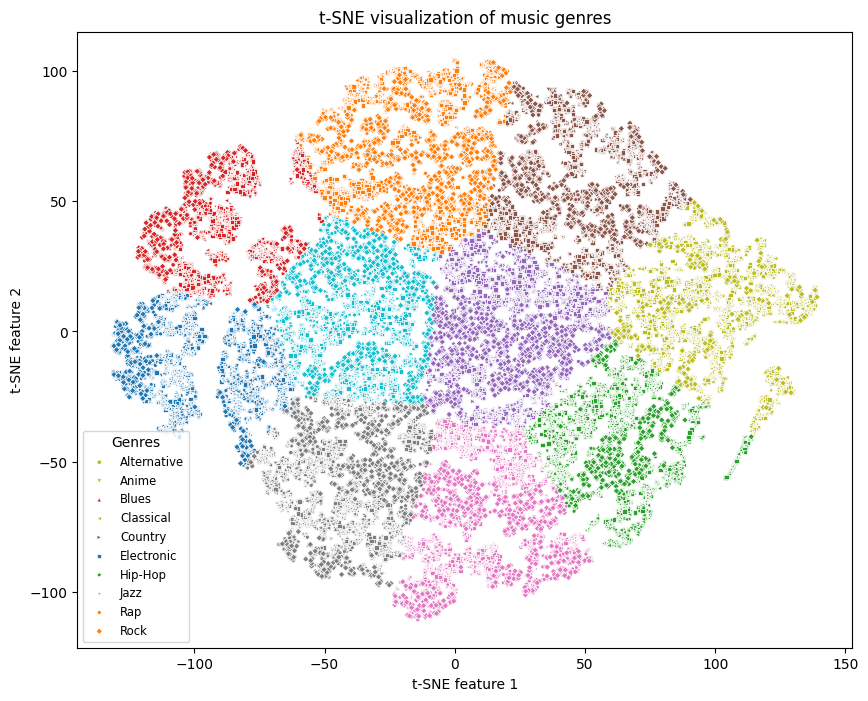

In [27]:
# Define different markers for each genre
markers = ['o', 'v', '^', '<', '>', 's', 'p', '*', 'h', 'D']
unique_genres = np.unique(y)
genre_to_marker = {genre: markers[i % len(markers)] for i, genre in enumerate(unique_genres)}

# Plot the t-SNE results with different colors for clusters and markers for genres
plt.figure(figsize=(10, 8))
for genre in unique_genres:
    genre_indices = (y == genre)
    plt.scatter(X_tsne[genre_indices, 0], X_tsne[genre_indices, 1], 
                c=clusters[genre_indices], cmap='tab10', s=10, 
                marker=genre_to_marker[genre], label=genre_mapping[genre], edgecolors='w', linewidth=0.5)

# Create a legend for genres
plt.legend(title="Genres", loc='best', fontsize='small', title_fontsize='medium')

plt.title('t-SNE visualization of music genres')
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.show()